# Necessary Libraries

In [9]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from operator import itemgetter, attrgetter

# Necessary Function

In [10]:
def nbindingE(Z,N):  #New Binding Energy Function
    A=Z+N
    a_v  =15.422
    a_s  =16.831
    a_c  =0.686
    a_a  =26.002
    a_as =-18.711
    a_p  = 11.199
    
    if((Z%2 ==0) and (N%2==0)):
        #print("even-even")
        n=1

    elif((Z%2 !=0) and (N%2!=0)):
        n=-1
        #print("odd-odd")
    else:
        n=0
        #print("even-odd")
    
    p_1 = a_v * A
    
    p_2 = a_s * (A**(2/3))

    p_3 = a_c * ( (Z**2)/(A**(1/3)) )
    
    p_4 = a_a + a_as/(A**(1/3))
    
    p_5 = ((A-(2*Z))**2)/A
    
    p_6 = a_p*n/(A**(1/2))
    
    
    
    B= p_1 -p_2 -p_3 -p_4 * p_5 -p_6
    
    return B
    

In [11]:
def ki(exp,the):
    ki_2=0
    
    #print(exp_the[0], "\n\n")
    
    
    for i in range(0, len(exp)):
        ki_2=ki_2+(exp[i]-the[i])**2
    
    #print(len(exp_the)) 
    return np.sqrt(ki_2/(len(exp)))

In [12]:
def nuc_error(exp, the):
    err=abs(exp-the)/exp
    return err 



# Data Export

In [13]:
#SKMS_all_nuclei-new.dat
#SKP_all_nuclei.dat
#SLY4_all_nuclei-new.dat

#SV-MIN_all_nuclei-new.dat
#UNEDF0_all_nuclei-new.dat
#UNEDF1_all_nuclei-new.dat

#6 Different theoretical Models


names=["SKMS_all_nuclei-new.dat", 
       "SKP_all_nuclei.dat",
       "SLY4_all_nuclei-new.dat", 
       "SV-MIN_all_nuclei-new.dat", 
       "UNEDF0_all_nuclei-new.dat", 
       "UNEDF1_all_nuclei-new.dat"]

#Experimental: skip_header=350, skip_footer=3433-2953
skip_H=[347,  304,  287,  316,  321,  310    ]
#skip_H =[0,    0,    0,    0,    0,    0  ]

top_F=[ 8700, 7478, 7264, 7924, 8300, 8324   ]
#top_F =[0,    0,    0,    0,    0,    0  ]
#skip_F=[0,    0,    0,    0,    0,    0  ]
skip_F=[5606, 4977, 4806, 5176, 5412, 5323   ]

Z_the    =[[],[],[],[],[],[]]
N_the    =[[],[],[],[],[],[]]
A_the    =[[],[],[],[],[],[]]

y_the    =[[],[],[],[],[],[]]
y_the_d  =[{},{},{},{},{},{}]

Q_the    =[[],[],[],[],[],[]]
Q_the_d  =[{},{},{},{},{},{}]

S_p_the  =[[],[],[],[],[],[]]
S_p_the_d=[{},{},{},{},{},{}]

S_2p_the    =[[],[],[],[],[],[]]
S_2p_the_d  =[{},{},{},{},{},{}]


S_n_the    =[[],[],[],[],[],[]]
S_n_the_d  =[{},{},{},{},{},{}]


S_2n_the   =[[],[],[],[],[],[]]
S_2n_the_d =[{},{},{},{},{},{}]

X_the      =[[],[],[],[],[],[]]

ZN_the    =[[],[],[],[],[],[]]
ZN_the_d  =[{},{},{},{},{},{}]
X_the    =[[],[],[],[],[],[]]

for i in range(0,6):
    Z_the [i]   = np.genfromtxt(names[i],usecols=1, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i])) #Number of protons
    N_the [i]   = np.genfromtxt(names[i],usecols=2, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i])) #Number of neutrons
    A_the [i]   = N_the[i]+Z_the[i]                     

    y_the [i]   = -np.genfromtxt(names[i],usecols=4, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(y_the[i])):
        y_the_d[i][Z_the[i][j],N_the[i][j]]=y_the[i][j]
    
    
    Q_the [i]   = -np.genfromtxt(names[i],usecols=9, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(Q_the[i])):
        Q_the_d[i][Z_the[i][j],N_the[i][j]]=Q_the[i][j]
    
    
    S_p_the  [i]= -np.genfromtxt(names[i],usecols=5, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_p_the[i])):
        S_p_the_d[i][Z_the[i][j],N_the[i][j]]=S_p_the[i][j]
    
    
    S_2p_the [i]= -np.genfromtxt(names[i],usecols=6, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_2p_the[i])):
        S_2p_the_d[i][Z_the[i][j],N_the[i][j]]=S_2p_the[i][j]
    
    
    S_n_the [i] = -np.genfromtxt(names[i],usecols=7, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_n_the[i])):
        S_n_the_d[i][Z_the[i][j],N_the[i][j]]=S_n_the[i][j]
    
    
    S_2n_the[i] = -np.genfromtxt(names[i],usecols=8, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_2n_the[i])):
        S_2n_the_d[i][Z_the[i][j],N_the[i][j]]=S_2n_the[i][j]
    
    ZN_the[i]= np.transpose(np.stack( (Z_the[i],N_the[i]) ))
    
    for j in range(0,len(ZN_the[i])):
        ZN_the_d[i][Z_the[i][j], N_the[i][j]]  =ZN_the[i][j]
    
    X_the[i]= np.transpose(np.stack(  (Z_the[i],      #0
                                       N_the[i],      #1
                                       A_the[i],      #2
                                       y_the[i],      #3
                                       S_p_the[i],    #4
                                       S_n_the[i],    #5
                                       S_2p_the[i],   #6
                                       S_2n_the[i],   #7
                                       Q_the[i]) ))   #8
     

In [14]:
#naturally
print("python is ROWS BY COLUMNS  \n")

print("np.shape(X_the): ", np.shape(X_the), "\n")

print("np.shape(X_the[0])", np.shape(X_the[0]), "\n")


print("the first row of X_the[0][0]: ", "\n")
print("Z, N, A, Y, S_p, S_n, S_2p, S_2n, Q_the")
print(X_the[0][0], "\n\n\n")

X_the=np.transpose(X_the)
print("X_the=np.transpose(X_the) \n")
print("python is ROWS BY COLUMNS  \n")

print("np.shape(X_the): ", np.shape(X_the), "\n")

print("np.shape(X_the[0])", np.shape(X_the[0]), "\n")


print("the first row of X_the[0][0]: ", "\n")
print("Z, N, A, Y, S_p, S_n, S_2p, S_2n, Q_the")
print(X_the[0][0], "\n\n\n")

for i in range(0,6):
    X_the[i]=np.transpose(X_the[i])

print("np.transpose(X_the[i]) \n")
print("python is ROWS BY COLUMNS  \n")

print("np.shape(X_the): ", np.shape(X_the), "\n")

print("np.shape(X_the[0])", np.shape(X_the[0]), "\n")


print("the first row of X_the[0][0,1,2]: ", "\n")
print("Z")
print(X_the[0][0], "\n")
print("N")
print(X_the[0][1], "\n")
print("A")
print(X_the[0][2], "\n\n\n")

for i in range(0,6):
    X_the[i]=np.transpose(X_the[i])



python is ROWS BY COLUMNS  

np.shape(X_the):  (6,) 

np.shape(X_the[0]) (5259, 9) 

the first row of X_the[0][0]:  

Z, N, A, Y, S_p, S_n, S_2p, S_2n, Q_the
[ 2.00000000e+01  1.40000000e+01  3.40000000e+01  2.52133057e+02
 -1.48703200e+00 -2.21114800e+01 -1.83160000e-02 -4.09485690e+01
  8.70180500e+00] 



X_the=np.transpose(X_the) 

python is ROWS BY COLUMNS  

np.shape(X_the):  (6,) 

np.shape(X_the[0]) (5259, 9) 

the first row of X_the[0][0]:  

Z, N, A, Y, S_p, S_n, S_2p, S_2n, Q_the
[ 2.00000000e+01  1.40000000e+01  3.40000000e+01  2.52133057e+02
 -1.48703200e+00 -2.21114800e+01 -1.83160000e-02 -4.09485690e+01
  8.70180500e+00] 



np.transpose(X_the[i]) 

python is ROWS BY COLUMNS  

np.shape(X_the):  (6,) 

np.shape(X_the[0]) (9, 5259) 

the first row of X_the[0][0,1,2]:  

Z
[20. 20. 20. ... 92. 92. 92.] 

N
[ 14.  15.  16. ... 218. 220. 222.] 

A
[ 34.  35.  36. ... 310. 312. 314.] 





# Importing Experimental Data

In [15]:
exp_h=350
exp_f=3433-3046

N_exp    = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3, skip_header=exp_h, skip_footer=exp_f)
Z_exp    = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4, skip_header=exp_h, skip_footer=exp_f)
A_exp    = N_exp+Z_exp                                                        #Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y_exp    = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5, skip_header=exp_h, skip_footer=exp_f)

S_p_exp  = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=12, skip_header=exp_h, skip_footer=exp_f)
S_2p_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=18, skip_header=exp_h, skip_footer=exp_f)

S_n_exp  =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=9, skip_header=exp_h, skip_footer=exp_f)
S_2n_exp =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=15, skip_header=exp_h, skip_footer=exp_f)


ZN_exp   = np.transpose(np.stack((Z_exp, N_exp)))
X_exp    = np.transpose(np.stack((Z_exp, N_exp,   A_exp,   y_exp,   S_p_exp,   S_n_exp,   S_2p_exp,   S_2n_exp)))
ZN_exp

array([[ 20.,  14.],
       [ 20.,  15.],
       [ 20.,  16.],
       ...,
       [ 92., 150.],
       [ 92., 151.],
       [ 93., 126.]])

# Finding where each theoretical values match experimental.  

## Purpose: training ml component.

In [16]:
y_exp_d={}
S_n_exp_d={}
S_2n_exp_d={}
S_p_exp_d={}
S_2p_exp_d={}



for i in range(0,len(N_exp)):
    y_exp_d[     Z_exp[i],   N_exp[i]]=  y_exp[i]
    
    S_n_exp_d[   Z_exp[i],   N_exp[i]]=  S_n_exp[i]
    S_2n_exp_d[  Z_exp[i],   N_exp[i]]=  S_2n_exp[i]
    
    S_p_exp_d[   Z_exp[i],   N_exp[i]]=  S_p_exp[i]
    S_2p_exp_d[  Z_exp[i],   N_exp[i]]=  S_2p_exp[i]


y_mat_the         =[[],[],[],[],[],[]]
y_mat_exp         =[[],[],[],[],[],[]]    
ZN_y_mat          =[[],[],[],[],[],[]]

S_p_mat_the       =[[],[],[],[],[],[]]
S_p_mat_exp       =[[],[],[],[],[],[]]
S_p_mat_the_d     =[{},{},{}, {},{},{}]
S_p_mat_exp_d     =[{},{},{}, {},{},{}]
ZN_S_p_mat        =[[],[],[],[],[],[]]

S_2p_mat_the      =[[],[],[],[],[],[]]
S_2p_mat_exp      =[[],[],[],[],[],[]]
ZN_S_2p_mat       =[[],[],[],[],[],[]]

S_n_mat_the       =[[],[],[],[],[],[]]
S_n_mat_exp       =[[],[],[],[],[],[]]

S_n_mat_the_d     =[{},{},{}, {},{},{}]
S_n_mat_exp_d     =[{},{},{}, {},{},{}]

ZN_S_n_mat        =[[],[],[],[],[],[]]

S_2n_mat_the      =[[],[],[],[],[],[]]
S_2n_mat_exp      =[[],[],[],[],[],[]]
ZN_S_2n_mat       =[[],[],[],[],[],[]]

Q_mat_the         =[[],[],[],[],[],[]]
Q_mat_the_d       =[{},{},{}, {},{},{}]
ZN_Q_mat          =[[],[],[],[],[],[]]
ZQ_mat            =[[],[],[],[],[],[]]
NQ_mat            =[[],[],[],[],[],[]]


X_mat             =[[],[],[],[],[],[]]

sigma             =[[],[],[],[],[],[]]

Z_y_mat           =[[],[],[],[],[],[]]
N_y_mat           =[[],[],[],[],[],[]]

y_mat_the_d       =[{},{},{}, {},{},{},]
y_mat_exp_d       =[{},{},{}, {},{},{},]

y_of_Q_mat_the_d  =[{},{},{}, {},{},{},]

for i in range(0,6):
    for ZN_exp_i in ZN_exp:
        
        try:
            y_mat_the[i].append(y_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            y_mat_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]=y_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]
            
            y_mat_exp[i].append(y_exp_d[ZN_exp_i[0],ZN_exp_i[1]])
            y_mat_exp_d[i][ZN_exp_i[0], ZN_exp_i[1]]=y_exp_d[ZN_exp_i[0],ZN_exp_i[1]]
            
            Z_y_mat[i].append(ZN_exp_i[0])
            N_y_mat[i].append(ZN_exp_i[1])
            
            ZN_y_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            
        except KeyError:
            continue
        
        try:
            S_p_mat_the[i].append(S_p_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_p_mat_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]=S_p_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]
            
            S_p_mat_exp[i].append(S_p_exp_d[ZN_exp_i[0],ZN_exp_i[1]])  
            S_p_mat_exp_d[i][ZN_exp_i[0],ZN_exp_i[1]]=S_p_exp_d[ZN_exp_i[0],ZN_exp_i[1]]
            
            ZN_S_p_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
        except KeyError:
            continue
        
        try:
            S_2p_mat_the[i].append(S_2p_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_2p_mat_exp[i].append(S_2p_exp_d[ZN_exp_i[0],ZN_exp_i[1]])  
            ZN_S_2p_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
        except KeyError:
            continue
        
        try:
            S_n_mat_the[i].append(S_n_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_n_mat_exp[i].append(S_n_exp_d[ZN_exp_i[0],ZN_exp_i[1]])  
            ZN_S_n_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_n_mat_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]=S_n_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]
            S_n_mat_exp_d[i][ZN_exp_i[0],ZN_exp_i[1]]=S_n_exp_d[ZN_exp_i[0],ZN_exp_i[1]]
   
            
        except KeyError:
            continue
        
        try:
            S_2n_mat_the[i].append(S_2n_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_2n_mat_exp[i].append(S_2n_exp_d[ZN_exp_i[0],ZN_exp_i[1]])  
            ZN_S_2n_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
        except KeyError:
            continue
       
        try:
            Q_mat_the[i].append(Q_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            Q_mat_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]=Q_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]
            
            ZN_Q_mat[i].append((ZN_exp_i[0],ZN_exp_i[1]))
            ZQ_mat[i].append( (ZN_exp_i[0], Q_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]) )
            NQ_mat[i].append( (ZN_exp_i[1], Q_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]) )
            
            y_of_Q_mat_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]=y_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]
            
        except KeyError:
            continue
            
    print(np.shape(y_mat_the[i]))
    print(np.shape(y_mat_the_d[i]))
    print(np.shape(y_mat_exp[i]))
    print(np.shape(y_mat_exp_d[i]))
    print(np.shape(Z_y_mat[i]))
    print(np.shape(N_y_mat[i]), "\n\n")
            
    

for i in range(0,6):
    ZN_y_mat[i]=np.transpose(ZN_y_mat[i])
    ZN_S_p_mat[i]=np.transpose(ZN_S_p_mat[i])
    ZN_S_2p_mat[i]=np.transpose(ZN_S_2p_mat[i])
    ZN_S_n_mat[i]=np.transpose(ZN_S_n_mat[i])
    ZN_S_2n_mat[i]=np.transpose(ZN_S_2n_mat[i])
    ZN_Q_mat[i]=np.transpose(ZN_Q_mat[i])

    

for i in range(0,6):
    X_mat[i]=np.transpose(np.stack((y_mat_the[i], y_mat_exp[i], 
                                    ZN_y_mat[i][0], ZN_y_mat[i][1],
                                    
                                    S_p_mat_the[i], S_p_mat_exp[i],  
                                    ZN_S_p_mat[i][0], ZN_S_p_mat[i][1],
                                    
                                    S_2p_mat_the[i], S_2p_mat_exp[i],   
                                    ZN_S_2p_mat[i][0], ZN_S_2p_mat[i][1],
                                    
                                    S_n_mat_the[i], S_n_mat_exp[i],  
                                    ZN_S_n_mat[i][0], ZN_S_n_mat[i][1],     
                                    
                                    S_2n_mat_the[i], S_2n_mat_exp[i], 
                                    ZN_S_2n_mat[i][0], ZN_S_2n_mat[i][1],
                                    
                                    Q_mat_the[i],
                                    ZN_Q_mat[i][0], ZN_Q_mat[i][1], ) ) ) 
    
    print("python is ROWS BY COLUMNS  \n")
    print(np.shape(X_mat[i]))
    print(X_mat[i][0])
    print(X_mat[i][0][0])
    

(2586,)
()
(2586,)
()
(2586,)
(2586,) 


(2615,)
()
(2615,)
()
(2615,)
(2615,) 


(2615,)
()
(2615,)
()
(2615,)
(2615,) 


(2612,)
()
(2612,)
()
(2612,)
(2612,) 


(2610,)
()
(2610,)
()
(2610,)
(2610,) 


(2621,)
()
(2621,)
()
(2621,)
(2621,) 


python is ROWS BY COLUMNS  

(2586, 23)
[ 2.52133057e+02  2.44917409e+02  2.00000000e+01  1.40000000e+01
 -1.48703200e+00 -5.02853000e-01  2.00000000e+01  1.40000000e+01
 -1.83160000e-02  1.46839700e+00  2.00000000e+01  1.40000000e+01
 -2.21114800e+01 -0.00000000e+00  2.00000000e+01  1.40000000e+01
 -4.09485690e+01 -0.00000000e+00  2.00000000e+01  1.40000000e+01
  8.70180500e+00  2.00000000e+01  1.40000000e+01]
252.133057
python is ROWS BY COLUMNS  

(2615, 23)
[ 2.50888200e+02  2.44917409e+02  2.00000000e+01  1.40000000e+01
 -1.70406900e+00 -5.02853000e-01  2.00000000e+01  1.40000000e+01
 -1.88987000e-01  1.46839700e+00  2.00000000e+01  1.40000000e+01
 -2.22662720e+01 -0.00000000e+00  2.00000000e+01  1.40000000e+01
 -4.11627390e+01 -0.00000000

# Error Analysis

In [17]:
for i in range(0,6):
    print("error:      ", ki(y_mat_exp[i], y_mat_the[i]) )
    X_mat[i]=np.transpose(X_mat[i])
    print("alt error:  ", ki(X_mat[i][0],X_mat[i][1]), "\n" )
    X_mat[i]=np.transpose(X_mat[i])
    

error:       6.395698570629776
alt error:   6.395698570629776 

error:       2.912195286502078
alt error:   2.912195286502078 

error:       4.571176105719517
alt error:   4.571176105719517 

error:       2.7671814634361946
alt error:   2.7671814634361946 

error:       1.452155342075984
alt error:   1.452155342075984 

error:       2.011524068619594
alt error:   2.011524068619594 



In [32]:
rf_ZQ_name=["rf_ZQ_SKMS",
            "rf_ZQ_SKP",
         "rf_ZQ_SLY4",
         "rf_ZQ_SV-MIN",
         "rf_ZQ_UNEDF0",
         "rf_ZQ_UNEDF1",]

rf_NQ_name=["rf_NQ_SKMS",
            "rf_NQ_SKP",
         "rf_NQ_SLY4",
         "rf_NQ_SV-MIN",
         "rf_NQ_UNEDF0",
         "rf_NQ_UNEDF1",]

rf_ZQ_predict =[ [], [], [], [], [], [] ]

rf_ZQ_sigma   =[ [], [], [], [], [], [] ]
rf_ZQ_score   =[ [], [], [], [], [], [] ]

std_ZQ        =[ [], [], [], [], [], [] ]
mean_ZQ       =[ [], [], [], [], [], [] ]



rf_NQ_predict =[ [], [], [], [], [], [] ]

rf_NQ_sigma   =[ [], [], [], [], [], [] ]
rf_NQ_score   =[ [], [], [], [], [], [] ]

std_NQ        =[ [], [], [], [], [], [] ]
mean_NQ       =[ [], [], [], [], [], [] ]
 
diff          =[ [], [], [], [], [], [] ]

for i in range(0,6):
    for j in range(0, len(y_mat_the[i])):
        diff[i].append(y_mat_the[i][j]-y_mat_exp[i][j])
        

for i in range(0,6):
    print(rf_ZQ_name[i])
    rf_ZQ_name[i]=RandomForestRegressor(n_estimators=1000)
    X_train, X_test, y_train, y_test = train_test_split(ZQ_mat[i], diff[i], test_size =0.05, random_state=42 )
    rf_ZQ_name[i].fit(X_train,y_train) 
    rf_ZQ_predict[i]=rf_ZQ_name[i].predict(ZQ_mat[i])
    
    print(rf_NQ_name[i])
    rf_NQ_name[i]=RandomForestRegressor(n_estimators=1000)
    X_train, X_test, y_train, y_test = train_test_split(NQ_mat[i], diff[i], test_size =0.05, random_state=42 )
    rf_NQ_name[i].fit(X_train,y_train) 
    rf_NQ_predict[i]=rf_NQ_name[i].predict(NQ_mat[i])
    
    
    
    
    rf_ZQ_score[i] =rf_ZQ_name[i].score(ZQ_mat[i], diff[i])
    rf_ZQ_sigma[i] =ki(diff[i],rf_ZQ_predict[i])
    
    print("SCORE")
    print("train score", rf_ZQ_name[i].score(X_train,y_train))
    print("test score", rf_ZQ_name[i].score(X_test,y_test))
    print("all score", rf_ZQ_score[i])
    print("sigma", ki(diff[i],rf_ZQ_predict[i]), '\n')
    
    rf_NQ_score[i] =rf_NQ_name[i].score(NQ_mat[i], diff[i])
    rf_NQ_sigma[i] =ki(diff[i],rf_NQ_predict[i])
    
    print("SCORE")
    print("train score", rf_NQ_name[i].score(X_train,y_train))
    print("test score", rf_NQ_name[i].score(X_test,y_test))
    print("all score", rf_NQ_score[i])
    print("sigma", ki(diff[i],rf_NQ_predict[i]), '\n')
    
    


rf_ZQ_SKMS
rf_NQ_SKMS
SCORE
train score 0.7524266447790268
test score 0.6162988885085358
all score 0.9724072486437599
sigma 0.9615888264694992 

SCORE
train score 0.9939029989786535
test score 0.9070154480840197
all score 0.9906513608535852
sigma 0.5597139134297446 

rf_ZQ_SKP
rf_NQ_SKP
SCORE
train score 0.33848969723502276
test score 0.2168708672824039
all score 0.97306416600734
sigma 0.43329949874063134 

SCORE
train score 0.9937279822157347
test score 0.9422305525956494
all score 0.991165753228207
sigma 0.24814626140459897 

rf_ZQ_SLY4
rf_NQ_SLY4
SCORE
train score -0.8313581755029138
test score -0.8237572675094205
all score 0.9652381640558779
sigma 0.6382860437264284 

SCORE
train score 0.9961160527905748
test score 0.9684678030782933
all score 0.9947281855992272
sigma 0.24856733256710628 

rf_ZQ_SV-MIN
rf_NQ_SV-MIN
SCORE
train score 0.3119797306515779
test score 0.315776507197175
all score 0.9542708222358651
sigma 0.36381970370400274 

SCORE
train score 0.9897232447713478
test scor

In [31]:
y_mat_the_w_ml   =[ [], [], [], [], [], [] ]
for i in range(0,6):
    
    for j in range(0, len(y_mat_the[i])):
        sub=y_mat_the[i][j]-rf_ZQ_predict[i][j]
        y_mat_the_w_ml[i].append(sub)
        
for i in range(0,6):
    print(names[i])
    print("ki of exp and y without ml:  ", ki(y_mat_exp[i],y_mat_the[i]))
    print("ki of exp and y with ml:     ", ki(y_mat_exp[i],y_mat_the_w_ml[i]))
    #print("ki of exp and y with ml:     ", np.sqrt(mean_squared_error(y_mat_exp[i],y_mat_the_w_ml[i])))
    #print("ki of exp and y without ml:  ", np.sqrt(mean_squared_error(y_mat_exp[i],y_mat_the[i])))
    print("ki of diff and ml:           ", ki(diff[i],rf_ZQ_predict[i]), '\n')
    
        

SKMS_all_nuclei-new.dat
ki of exp and y without ml:   6.395698570629776
ki of exp and y with ml:      2.1578476635770185
ki of diff and ml:            2.157847663577023 

SKP_all_nuclei.dat
ki of exp and y without ml:   2.912195286502078
ki of exp and y with ml:      0.940524461287295
ki of diff and ml:            0.9405244612872948 

SLY4_all_nuclei-new.dat
ki of exp and y without ml:   4.571176105719517
ki of exp and y with ml:      1.4218483242661886
ki of diff and ml:            1.4218483242661892 

SV-MIN_all_nuclei-new.dat
ki of exp and y without ml:   2.7671814634361946
ki of exp and y with ml:      0.8135586987271962
ki of diff and ml:            0.8135586987271956 

UNEDF0_all_nuclei-new.dat
ki of exp and y without ml:   1.452155342075984
ki of exp and y with ml:      0.8617746252511607
ki of diff and ml:            0.861774625251163 

UNEDF1_all_nuclei-new.dat
ki of exp and y without ml:   2.011524068619594
ki of exp and y with ml:      1.0689626410464719
ki of diff and ml:  

In [20]:
diff          =[ [], [], [], [], [], [] ]
rf_ZN_predict =[ [], [], [], [], [], [] ]

rf_ZN_sigma   =[ [], [], [], [], [], [] ]
rf_ZN_score   =[ [], [], [], [], [], [] ]


rf_ZN_name=["rf_ZN_SKMS",
         "rf_ZN_SKP",
         "rf_ZN_SLY4",
         "rf_ZN_SV-MIN",
         "rf_ZN_UNEDF0",
         "rf_ZN_UNEDF1",]

std_ZN        =[ [], [], [], [], [], [] ]
mean_ZN       =[ [], [], [], [], [], [] ]


for i in range(0,6):
    for j in range(0, len(y_mat_the[i])):
        diff[i].append(y_mat_the[i][j]-y_mat_exp[i][j])
    
    
    
    print(rf_ZN_name[i])
    rf_ZN_name[i]=RandomForestRegressor(n_estimators=1000)
    
    X_train, X_test, y_train, y_test = train_test_split(np.transpose(ZN_y_mat[i]), diff[i], test_size =0.05) #, random_state=42 )
    
    rf_ZN_name[i].fit(X_train,y_train)
    rf_ZN_predict[i]=rf_ZN_name[i].predict(np.transpose(ZN_y_mat[i]))
     
    

rf_ZN_SKMS
rf_ZN_SKP
rf_ZN_SLY4
rf_ZN_SV-MIN
rf_ZN_UNEDF0
rf_ZN_UNEDF1


In [21]:
y_mat_the_w_ml   =[ [], [], [], [], [], [] ]
for i in range(0,6):
    
    for j in range(0, len(y_mat_the[i])):
        sub=y_mat_the[i][j]-rf_ZN_predict[i][j]
        #sub1=
        y_mat_the_w_ml[i].append(sub)
        
for i in range(0,6):
    print(np.shape(y_mat_the_w_ml[i]))
    print("ki of exp and y with ml:     ", ki(y_mat_exp[i], y_mat_the_w_ml[i]))
    print("ki of exp and y with ml:     ", np.sqrt(mean_squared_error(y_mat_exp[i],y_mat_the_w_ml[i])))
    print("ki of exp and y without ml:  ", ki(y_mat_exp[i],y_mat_the[i]))
    print("ki of exp and y without ml:  ", np.sqrt(mean_squared_error(y_mat_exp[i],y_mat_the[i])))
        

(2586,)
(2586,)
(2586,)
(2586,)
244.917409
252.133057
7.215648000000016
6.5742155130000715 

(2615,)
(2615,)
(2615,)
(2615,)
244.917409
250.8882
5.97079100000002
5.634257792999973 

(2615,)
(2615,)
(2615,)
(2615,)
244.917409
251.120312
6.2029030000000205
5.689335339000031 

(2612,)
(2612,)
(2612,)
(2612,)
244.917409
248.52351
3.6061009999999953
3.220837347999957 

(2610,)
(2610,)
(2610,)
(2610,)
262.026409
266.58797
4.561560999999983
4.276537503999987 

(2621,)
(2621,)
(2621,)
(2621,)
244.917409
244.740497
-0.1769119999999873
-0.16975126999998888 

(2586,)
ki of exp and y with ml:      0.16435268611203585
ki of exp and y with ml:      0.1643526861120358
ki of exp and y without ml:   6.395698570629776
ki of exp and y without ml:   6.3956985706297775
(2615,)
ki of exp and y with ml:      0.12834306092254738
ki of exp and y with ml:      0.12834306092254724
ki of exp and y without ml:   2.912195286502078
ki of exp and y without ml:   2.912195286502078
(2615,)
ki of exp and y with ml:     

# Finding where all theoretical models match each other

In [22]:
Z_all_mat          =[]
N_all_mat          =[]
y_all_mat          =[[],[],[],[],[],[]]
Q_all_mat          =[[],[],[],[],[],[]]

y_all_mat_d        =[{},{},{},{},{},{}]
Q_all_mat_d        =[{},{},{},{},{},{}]

y_std_all_mat      =[]
y_ind_std_all      =[[],[],[],[],[],[]]
y_mean_all_mat     =[]

y_err              =[[],[],[],[],[],[]]
y_mean_err         =[[],[],[],[],[],[]]

diff_all           =[[],[],[],[],[],[]]
    

for z in range(19,120):
    for n in range(10, 200):
        try:
            sub=[]
            
            test=y_the_d[0][z,n]
            test=y_the_d[1][z,n]
            test=y_the_d[2][z,n]
            test=y_the_d[3][z,n]
            test=y_the_d[4][z,n]
            test=y_the_d[5][z,n]
            test=y_exp_d[z,n]
            
            y_all_mat[0].append(y_the_d[0][z,n])
            y_all_mat_d[0][z,n]=y_the_d[0][z,n]
            
            Q_all_mat[0].append(Q_the_d[0][z,n])
            Q_all_mat_d[0][z,n]=Q_the_d[0][z,n]
            
            sub.append(y_the_d[0][z,n])
            
            y_all_mat[1].append(y_the_d[1][z,n])
            y_all_mat_d[1][z,n]=y_the_d[1][z,n]
            
            Q_all_mat[1].append(Q_the_d[1][z,n])
            Q_all_mat_d[1][z,n]=Q_the_d[1][z,n]
            
            sub.append(y_the_d[1][z,n])
            
            y_all_mat[2].append(y_the_d[2][z,n])
            y_all_mat_d[2][z,n]=y_the_d[2][z,n]
            
            Q_all_mat[2].append(Q_the_d[2][z,n])
            Q_all_mat_d[2][z,n]=Q_the_d[2][z,n]
            
            sub.append(y_the_d[2][z,n])
            
            y_all_mat[3].append(y_the_d[3][z,n])
            y_all_mat_d[3][z,n]=y_the_d[3][z,n]
            
            Q_all_mat[3].append(Q_the_d[3][z,n])
            Q_all_mat_d[3][z,n]=Q_the_d[3][z,n]
            
            sub.append(y_the_d[3][z,n])
            
            y_all_mat[4].append(y_the_d[4][z,n])
            y_all_mat_d[4][z,n]=y_the_d[4][z,n]
            
            Q_all_mat[4].append(Q_the_d[4][z,n])
            Q_all_mat_d[4][z,n]=Q_the_d[4][z,n]
            
            sub.append(y_the_d[4][z,n])
            
            y_all_mat[5].append(y_the_d[5][z,n])
            y_all_mat_d[5][z,n]=y_the_d[5][z,n]
            
            Q_all_mat[5].append(Q_the_d[5][z,n])
            Q_all_mat_d[5][z,n]=Q_the_d[5][z,n]
            
            sub.append(y_the_d[5][z,n])
            
            y_std_all_mat.append( np.std(sub))
            y_mean_all_mat.append(np.mean(sub))
            
            
            Z_all_mat.append(z)
            N_all_mat.append(n)
            
            for i in range(0,6):
                diff_all[i].append(y_exp_d[z,n]-y_the_d[i][z,n])
                y_err[i].append(nuc_error(y_exp_d[z,n], y_the_d[i][z,n]))
                y_mean_err[i].append(nuc_error(np.mean(sub), y_the_d[i][z,n]))
                
            
        except KeyError:
            continue
            

# Plots

STANDARD DEVIATION WITHOUT ML


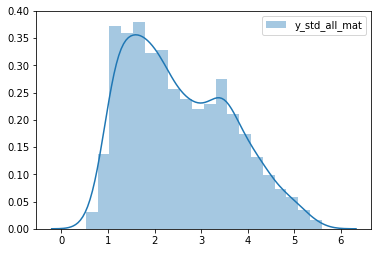

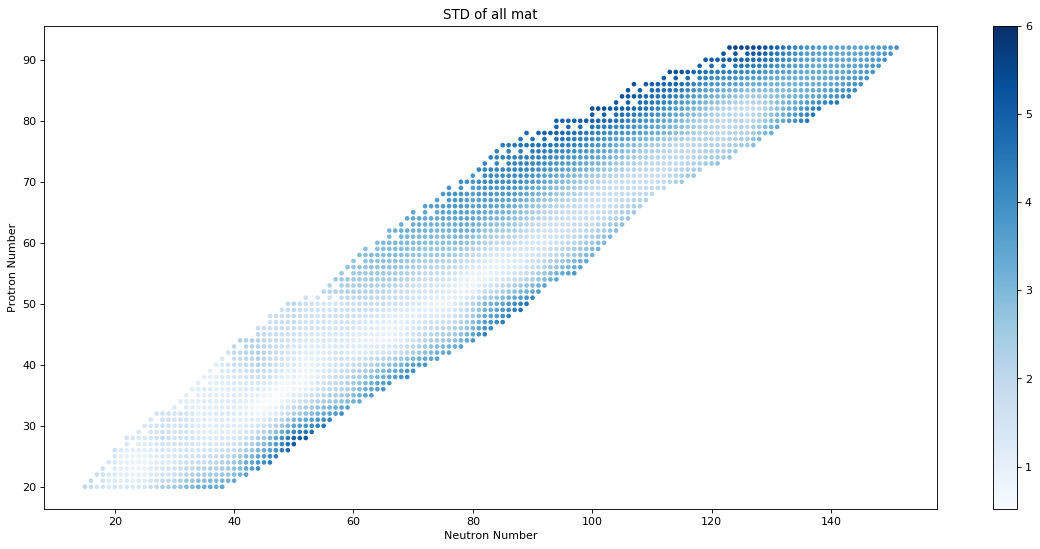

difference


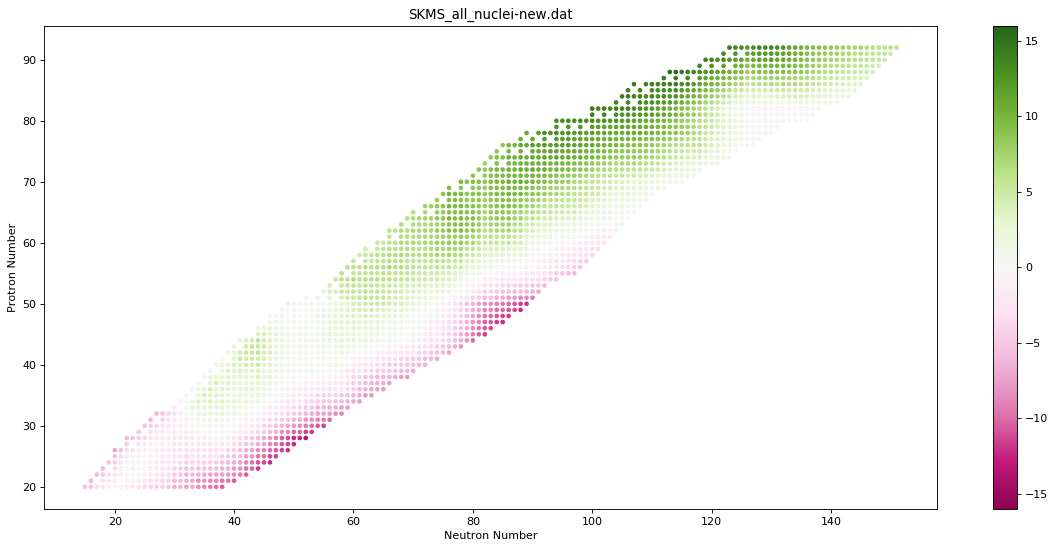

difference


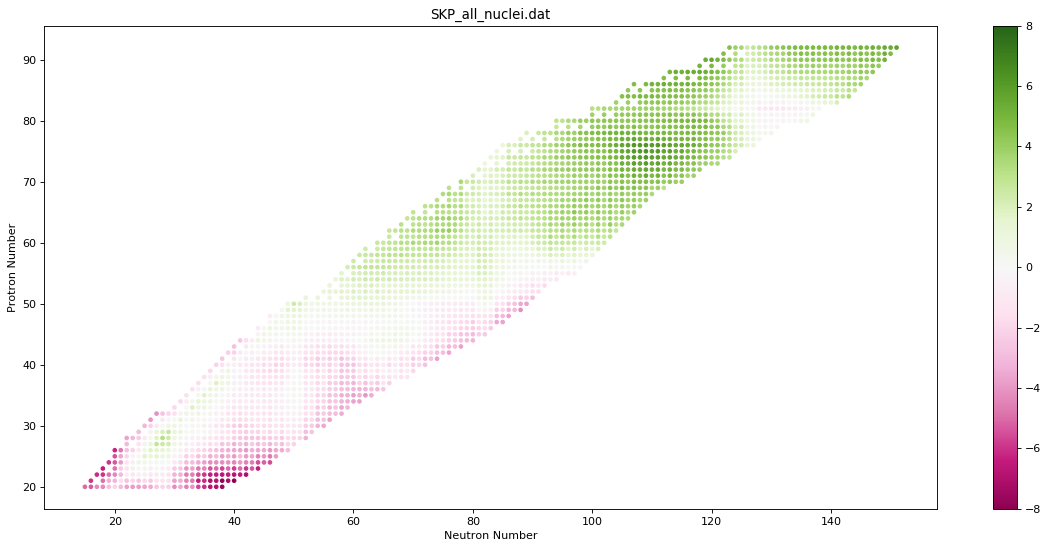

difference


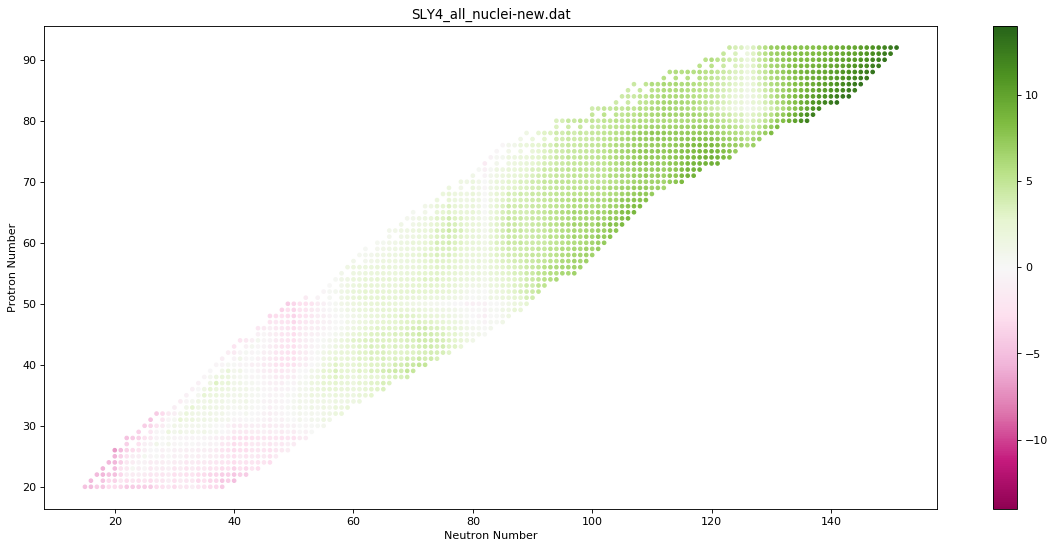

difference


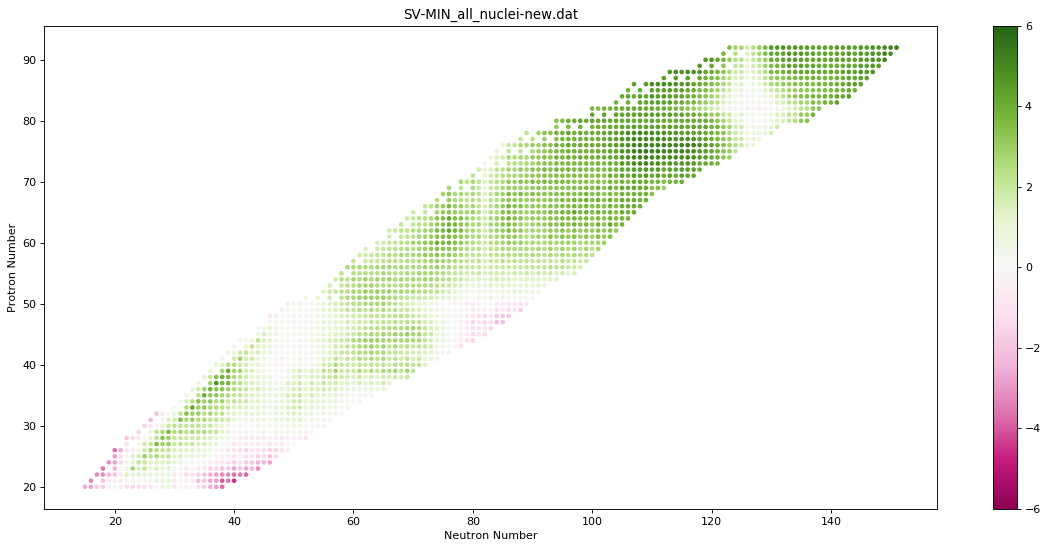

difference


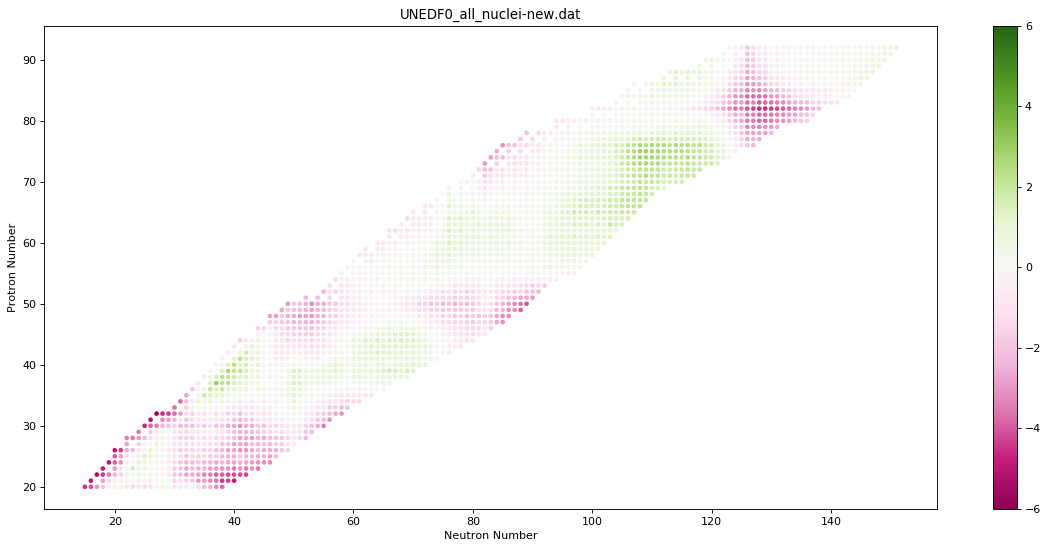

difference


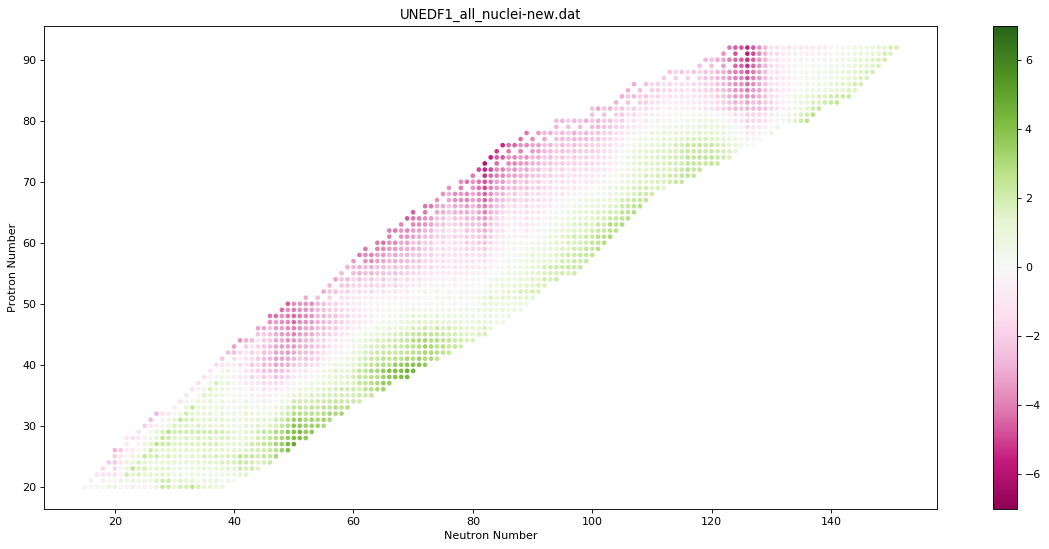

In [23]:
            
print("STANDARD DEVIATION WITHOUT ML")

sns.distplot(y_std_all_mat, label='y_std_all_mat')
plt.legend()
plt.show()

   
ext = np.int(np.ceil(max(y_std_all_mat)))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(N_all_mat,Z_all_mat,c=y_std_all_mat,cmap='Blues',vmax=ext,s=10)
plt.colorbar(sc)
plt.title("STD of all mat")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()

for i in range(0,6):
    
    print("difference")
    ext = np.int(np.ceil(max(-np.min(diff_all[i]),np.max(diff_all[i]))))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(N_all_mat,Z_all_mat,c=diff_all[i],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()

    

error of:  SKMS_all_nuclei-new.dat


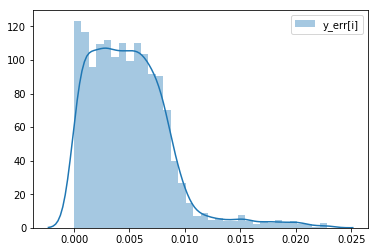

difference between:  SKMS_all_nuclei-new.dat  and mean


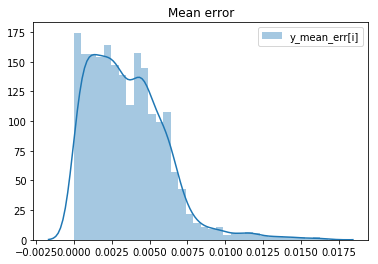

difference between:  SKMS_all_nuclei-new.dat  and mean


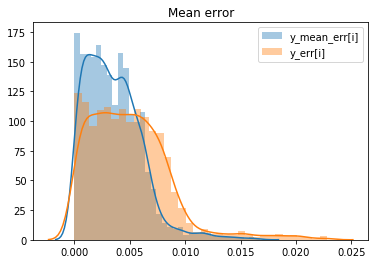

error of:  SKP_all_nuclei.dat


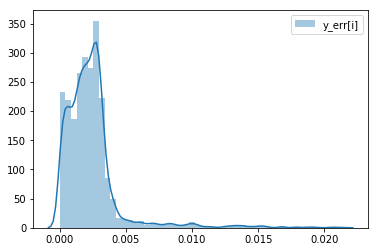

difference between:  SKP_all_nuclei.dat  and mean


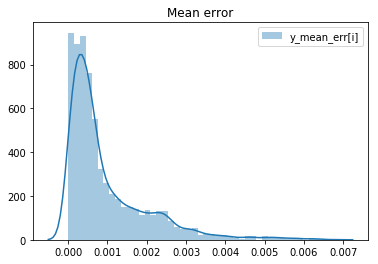

difference between:  SKP_all_nuclei.dat  and mean


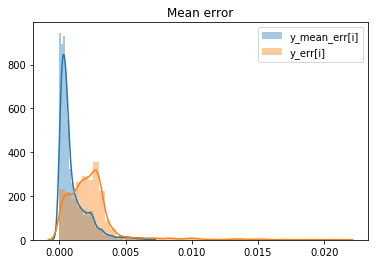

error of:  SLY4_all_nuclei-new.dat


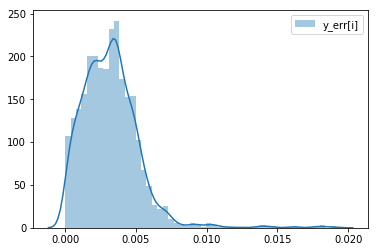

difference between:  SLY4_all_nuclei-new.dat  and mean


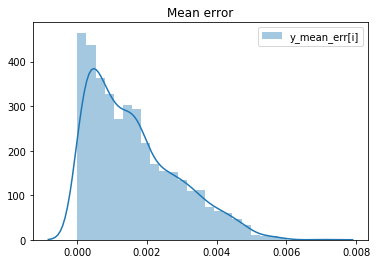

difference between:  SLY4_all_nuclei-new.dat  and mean


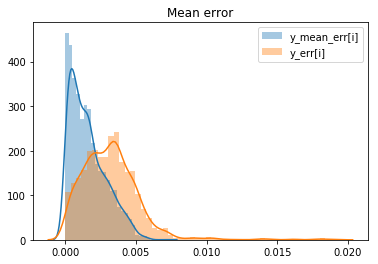

error of:  SV-MIN_all_nuclei-new.dat


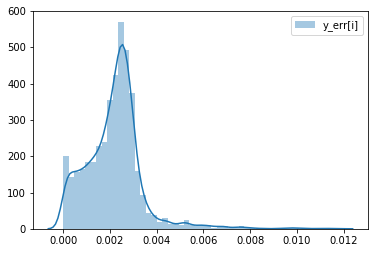

difference between:  SV-MIN_all_nuclei-new.dat  and mean


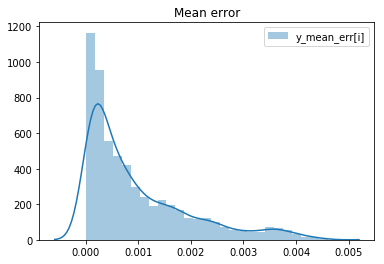

difference between:  SV-MIN_all_nuclei-new.dat  and mean


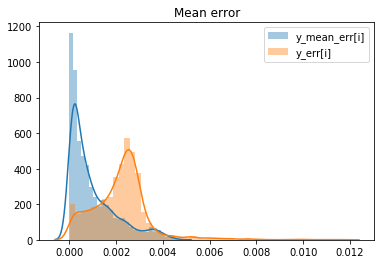

error of:  UNEDF0_all_nuclei-new.dat


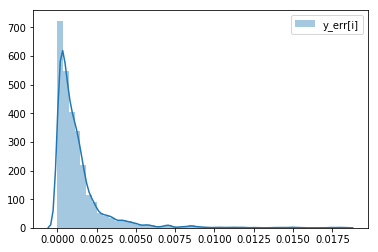

difference between:  UNEDF0_all_nuclei-new.dat  and mean


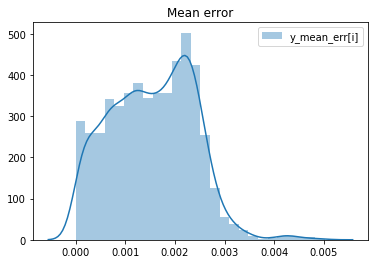

difference between:  UNEDF0_all_nuclei-new.dat  and mean


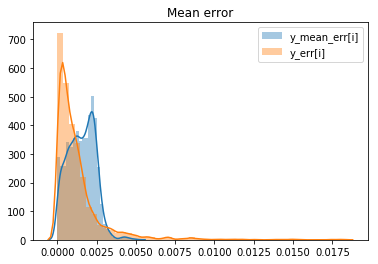

error of:  UNEDF1_all_nuclei-new.dat


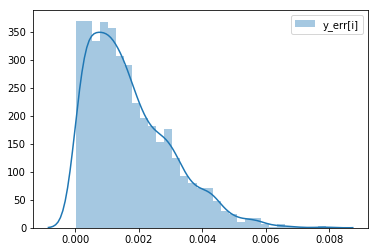

difference between:  UNEDF1_all_nuclei-new.dat  and mean


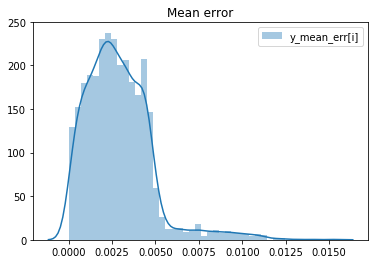

difference between:  UNEDF1_all_nuclei-new.dat  and mean


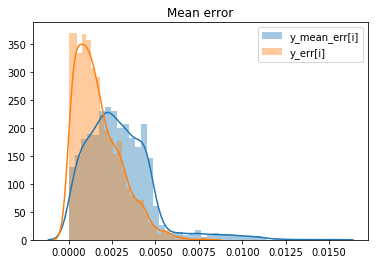

In [24]:

for i in range(0,6):

    print("error of: ", names[i])
    sns.distplot(y_err[i], label='y_err[i]')
    plt.legend()
    plt.show()
    
    print("difference between: ", names[i], " and mean")
    sns.distplot(y_mean_err[i], label='y_mean_err[i]')
    plt.title("Mean error")
    plt.legend()
    plt.show()
    
    print("difference between: ", names[i], " and mean")
    sns.distplot(y_mean_err[i], label='y_mean_err[i]')
    sns.distplot(y_err[i], label='y_err[i]')
    plt.title("Mean error")
    plt.legend()
    plt.show()
    
    
    

error of:  SKMS_all_nuclei-new.dat


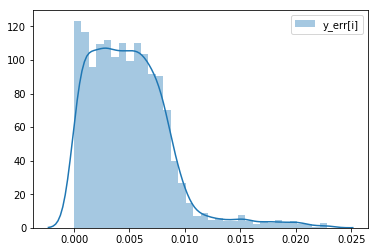

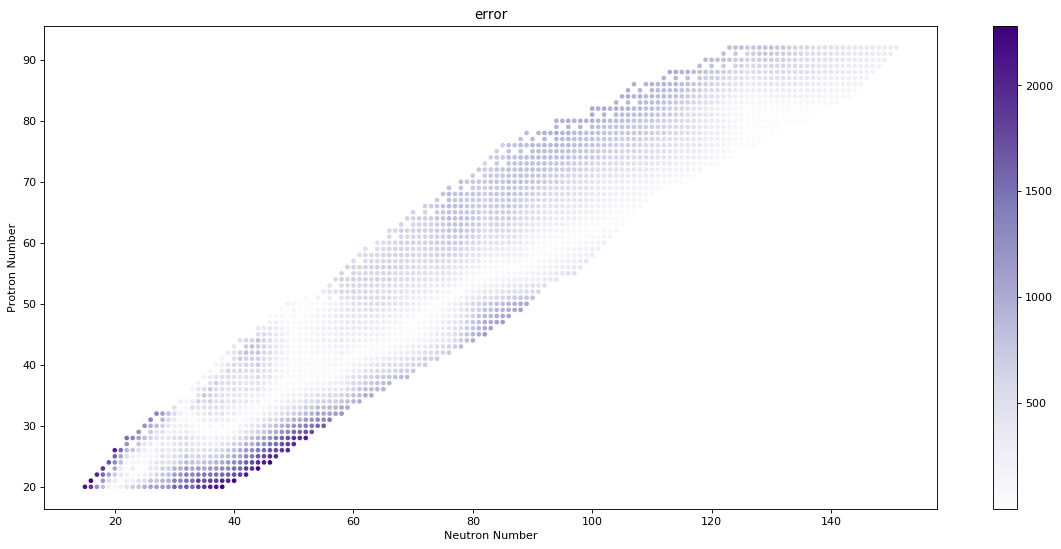

error of:  SKP_all_nuclei.dat


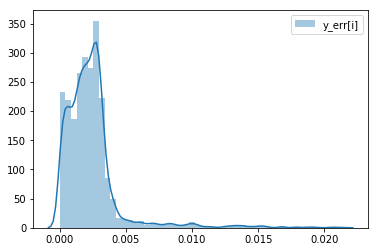

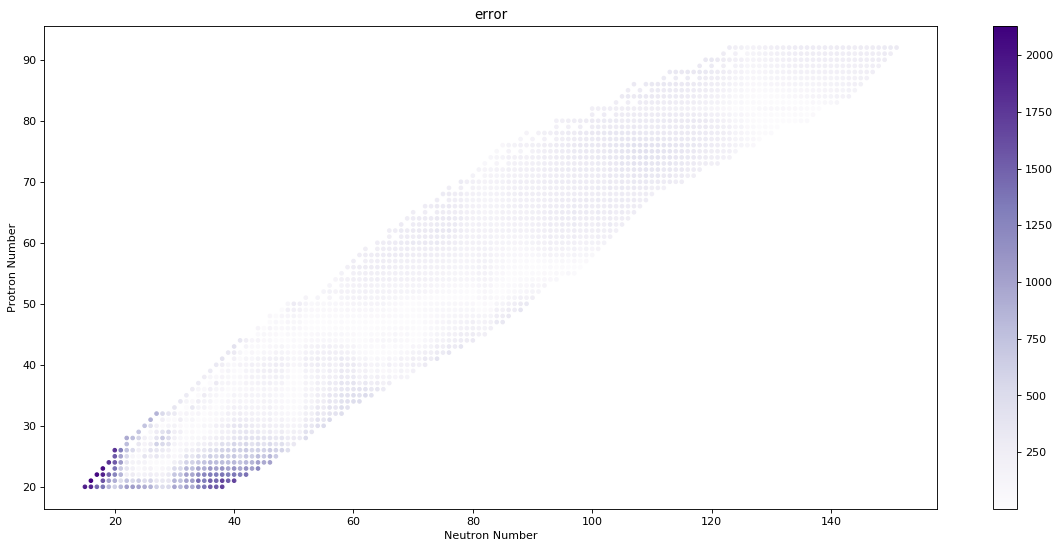

error of:  SLY4_all_nuclei-new.dat


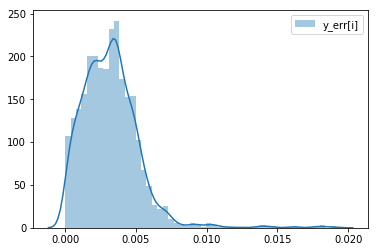

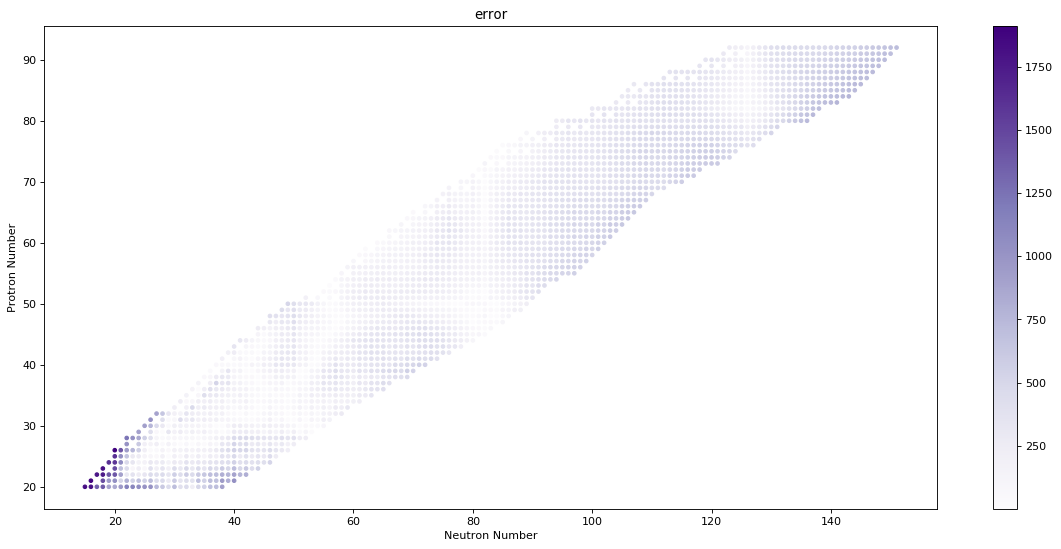

error of:  SV-MIN_all_nuclei-new.dat


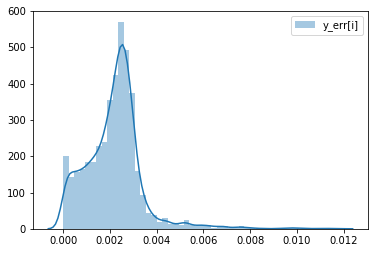

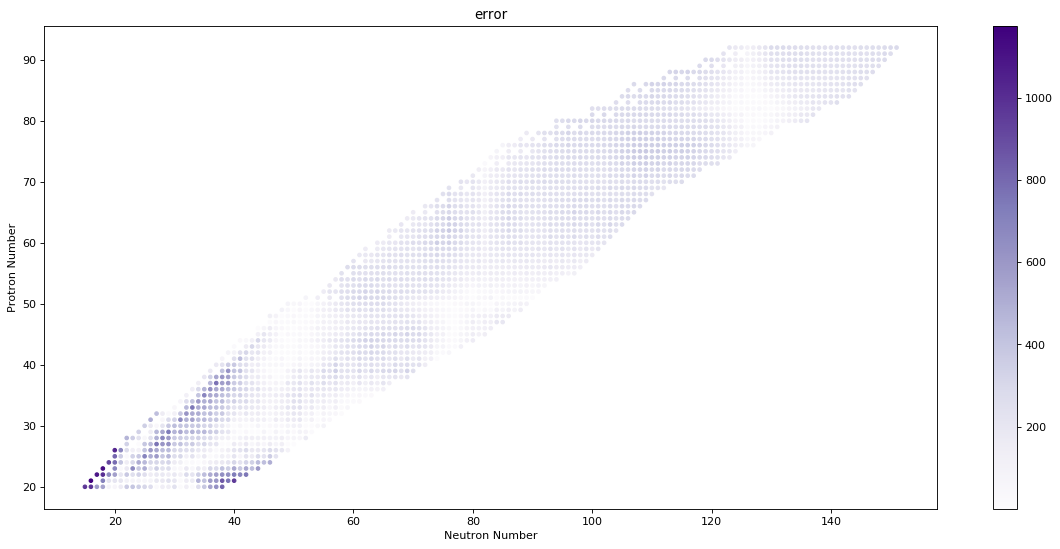

error of:  UNEDF0_all_nuclei-new.dat


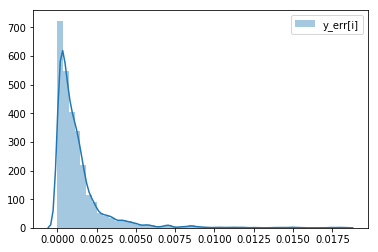

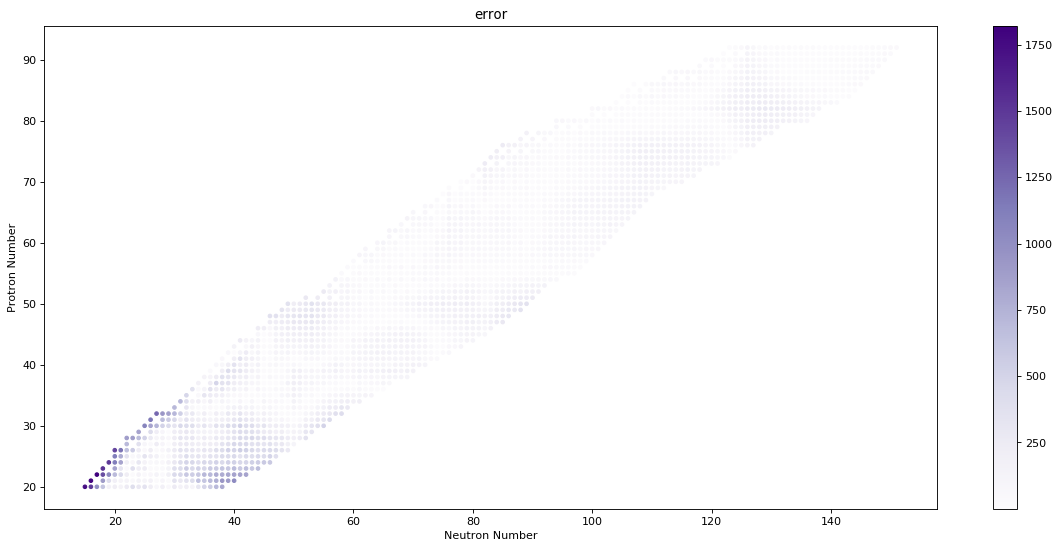

error of:  UNEDF1_all_nuclei-new.dat


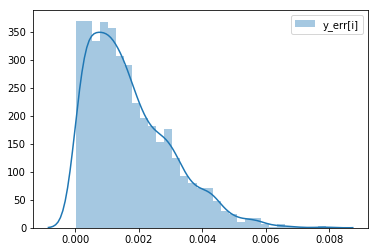

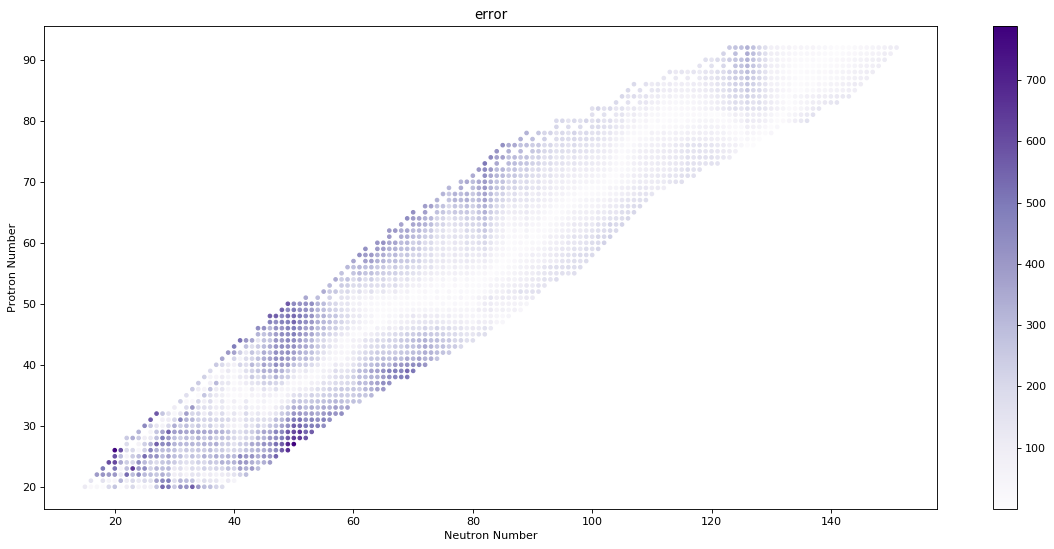

In [25]:
   
for i in range(0,6):

    print("error of: ", names[i])
    sns.distplot(y_err[i], label='y_err[i]')
    plt.legend()
    plt.show()
    
    
    
    
    for j in range(0,len(y_err[i])):
        y_err[i][j]=y_err[i][j]*(100000)
    
    
    ext = np.int(np.ceil(max(y_err[i])))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(N_all_mat,Z_all_mat,c=y_err[i],cmap='Purples',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title("error")
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()

    

difference between:  SKMS_all_nuclei-new.dat  and mean


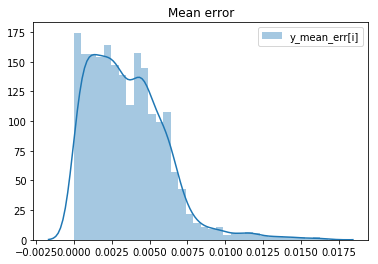

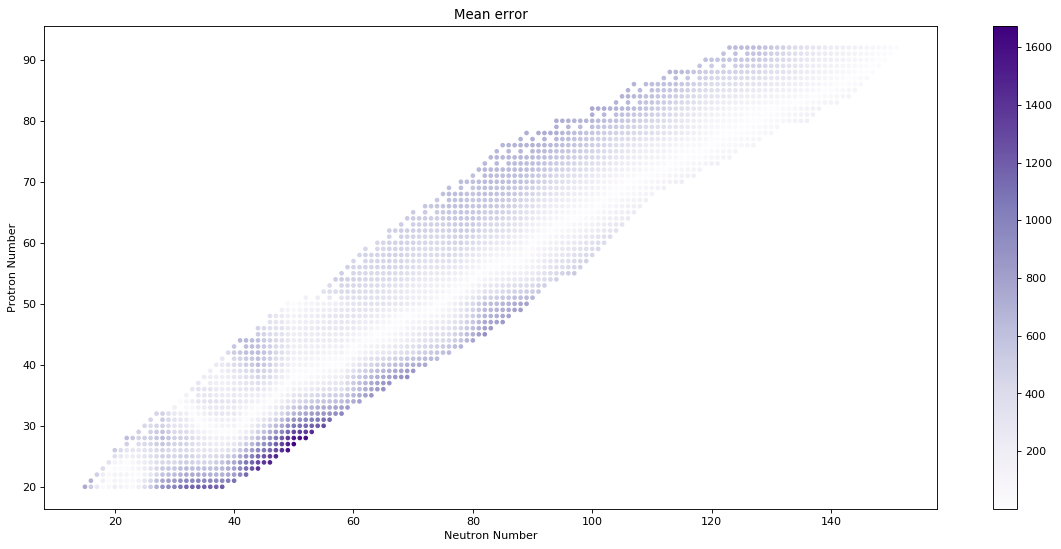

difference between:  SKP_all_nuclei.dat  and mean


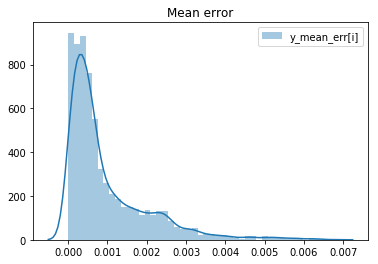

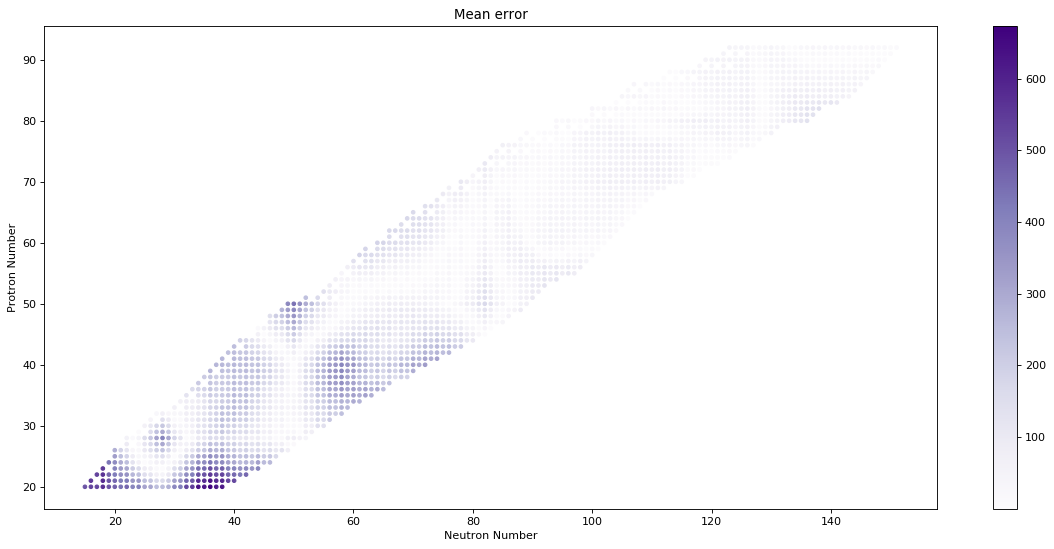

difference between:  SLY4_all_nuclei-new.dat  and mean


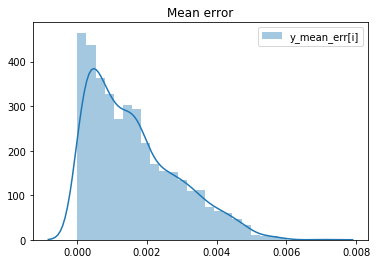

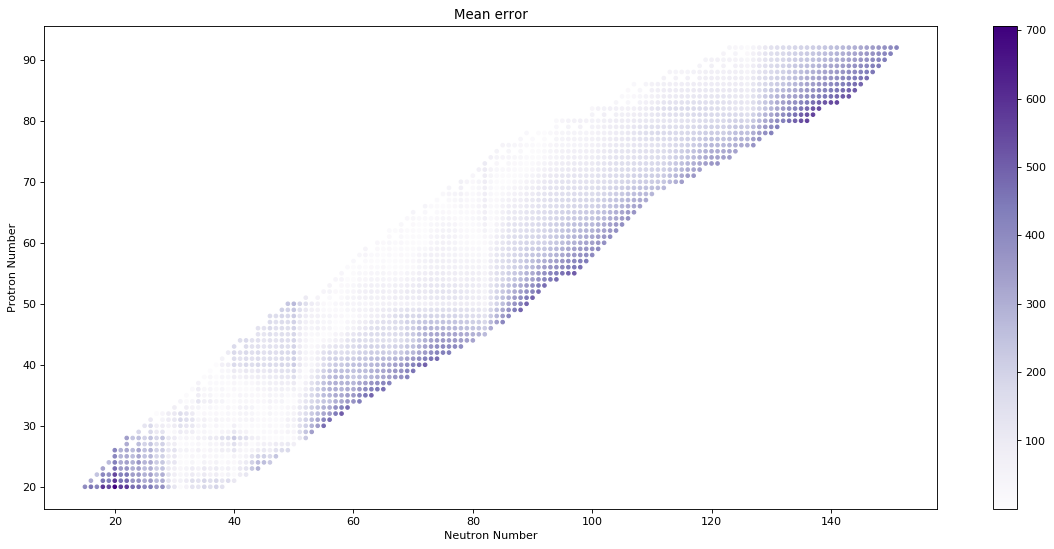

difference between:  SV-MIN_all_nuclei-new.dat  and mean


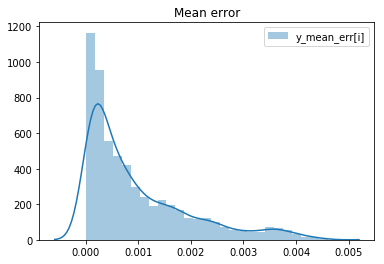

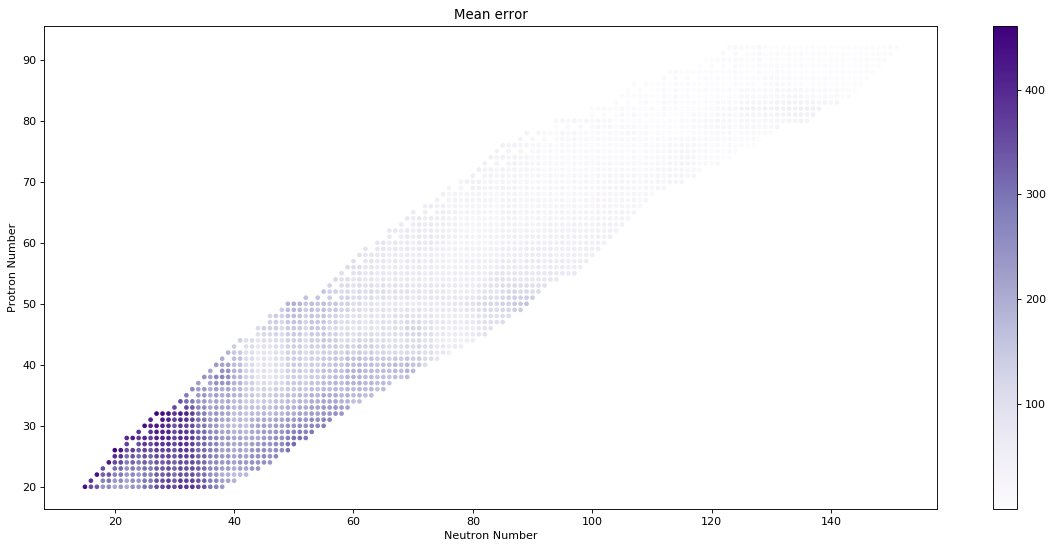

difference between:  UNEDF0_all_nuclei-new.dat  and mean


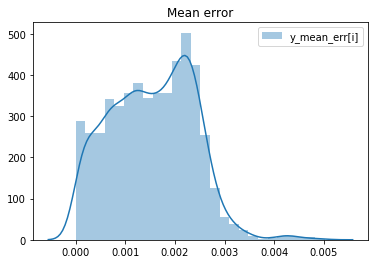

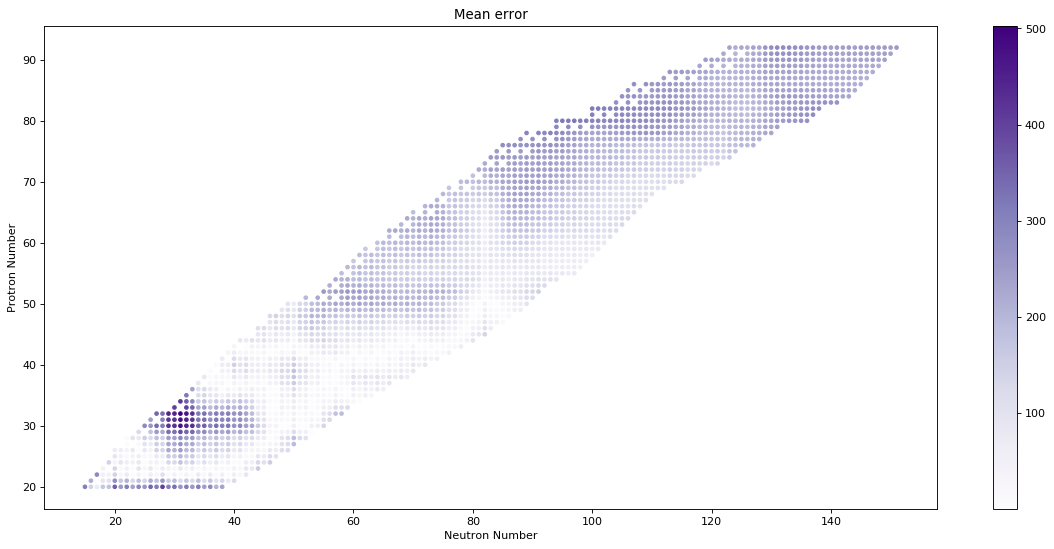

difference between:  UNEDF1_all_nuclei-new.dat  and mean


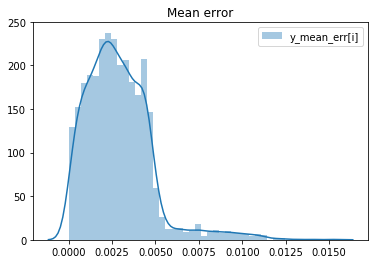

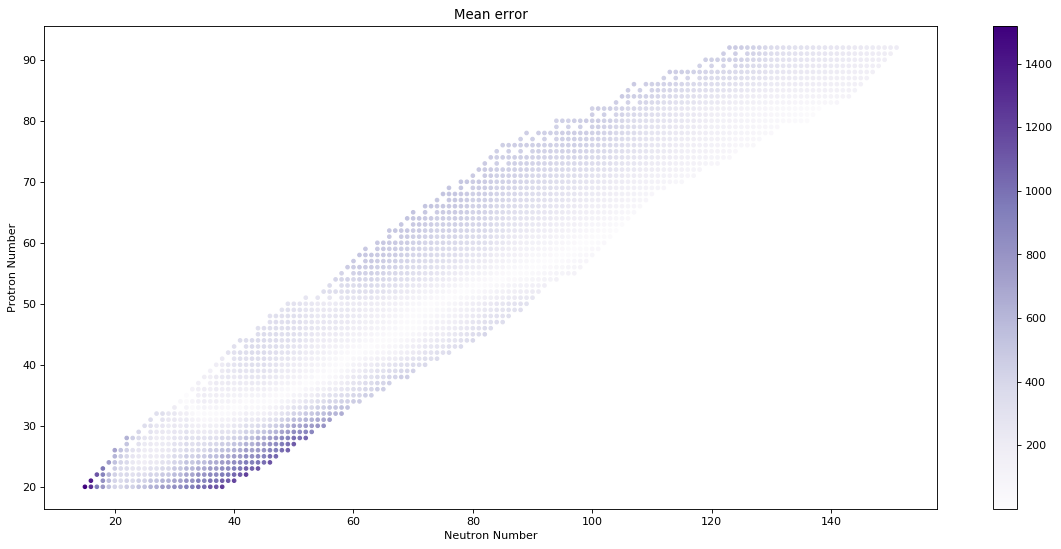

In [26]:
for i in range(0,6):
  
    print("difference between: ", names[i], " and mean")
    sns.distplot(y_mean_err[i], label='y_mean_err[i]')
    plt.title("Mean error")
    plt.legend()
    plt.show()
    
    for j in range(0,len(y_mean_err[i])):
        y_mean_err[i][j]=y_mean_err[i][j]*(100000)
    
    ext = np.int(np.ceil(max(y_mean_err[i])))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(N_all_mat,Z_all_mat,c=y_mean_err[i],cmap='Purples',vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title("Mean error")
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    